# Kobe Bryant Shot Selection

Kaggle에서 열렸던 'Kobe Bryant Shot Selection' competition에 공개된 데이터입니다. (링크: https://www.kaggle.com/c/kobe-bryant-shot-selection)

여러 kernel들 중 아래 2개를 많이 참고하였습니다.
- https://www.kaggle.com/khozzy/kobe-shots-show-me-your-best-model
- https://www.kaggle.com/dixhom/data-analysis-for-beginners

`missingno`, `scikit-plot` 패키지가 깔려있지 않다면 다음 명령어를 통해 설치해주십시오.
- jupyter notebook에서 설치하는 방법: `!pip install missingno scikit-plot
- 참고: https://github.com/reiinakano/scikit-plot, https://github.com/ResidentMario/missingno

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import scikitplot as skplt

## Read and explore the raw data

In [2]:
# import data
filename = './data/data.csv'
data = pd.read_csv(filename)

In [3]:
data.head(10)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10


In [4]:
data.shape

(30697, 25)

### 1. Data types

In [5]:
data.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

변수들 중 일부의 유형을 변경해봅시다.

In [6]:
data.set_index('shot_id', inplace=True)
data["action_type"] = data["action_type"].astype('category')
data["combined_shot_type"] = data["combined_shot_type"].astype('category')
data["period"] = data["period"].astype('category')
data["playoffs"] = data["playoffs"].astype('category')
data["season"] = data["season"].astype('category')
data["shot_made_flag"] = data["shot_made_flag"].astype('category')
data["shot_type"] = data["shot_type"].astype('category')

In [7]:
data.dtypes

action_type           category
combined_shot_type    category
game_event_id            int64
game_id                  int64
lat                    float64
loc_x                    int64
loc_y                    int64
lon                    float64
minutes_remaining        int64
period                category
playoffs              category
season                category
seconds_remaining        int64
shot_distance            int64
shot_made_flag        category
shot_type             category
shot_zone_area          object
shot_zone_basic         object
shot_zone_range         object
team_id                  int64
team_name               object
game_date               object
matchup                 object
opponent                object
dtype: object

### 2. Descriptive statistics

In [8]:
data.describe(include=['number'])
# data.describe(include=[np.number]) # 위와 똑같은 결과

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,seconds_remaining,shot_distance,team_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,3.069700e+04
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,28.365085,13.437437,1.610613e+09
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,17.478949,9.374189,0.000000e+00
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,0.000000,0.000000,1.610613e+09
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,13.000000,5.000000,1.610613e+09
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,28.000000,15.000000,1.610613e+09
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,43.000000,21.000000,1.610613e+09
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,59.000000,79.000000,1.610613e+09


In [9]:
data.describe(include=['category', 'object'])

,action_type,combined_shot_type,period,playoffs,season,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent
count,30697,30697,30697,30697,30697,25697.0,30697,30697,30697,30697,30697,30697,30697,30697
unique,57,6,7,2,20,2.0,2,6,7,5,1,1559,74,33
top,Jump Shot,Jump Shot,3,0,2005-06,0.0,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,Los Angeles Lakers,2016-04-13,LAL @ SAS,SAS
freq,18880,23485,8296,26198,2318,14232.0,24271,13455,12625,9398,30697,50,1020,1978


## Preprocess the data

### 1. Missing values

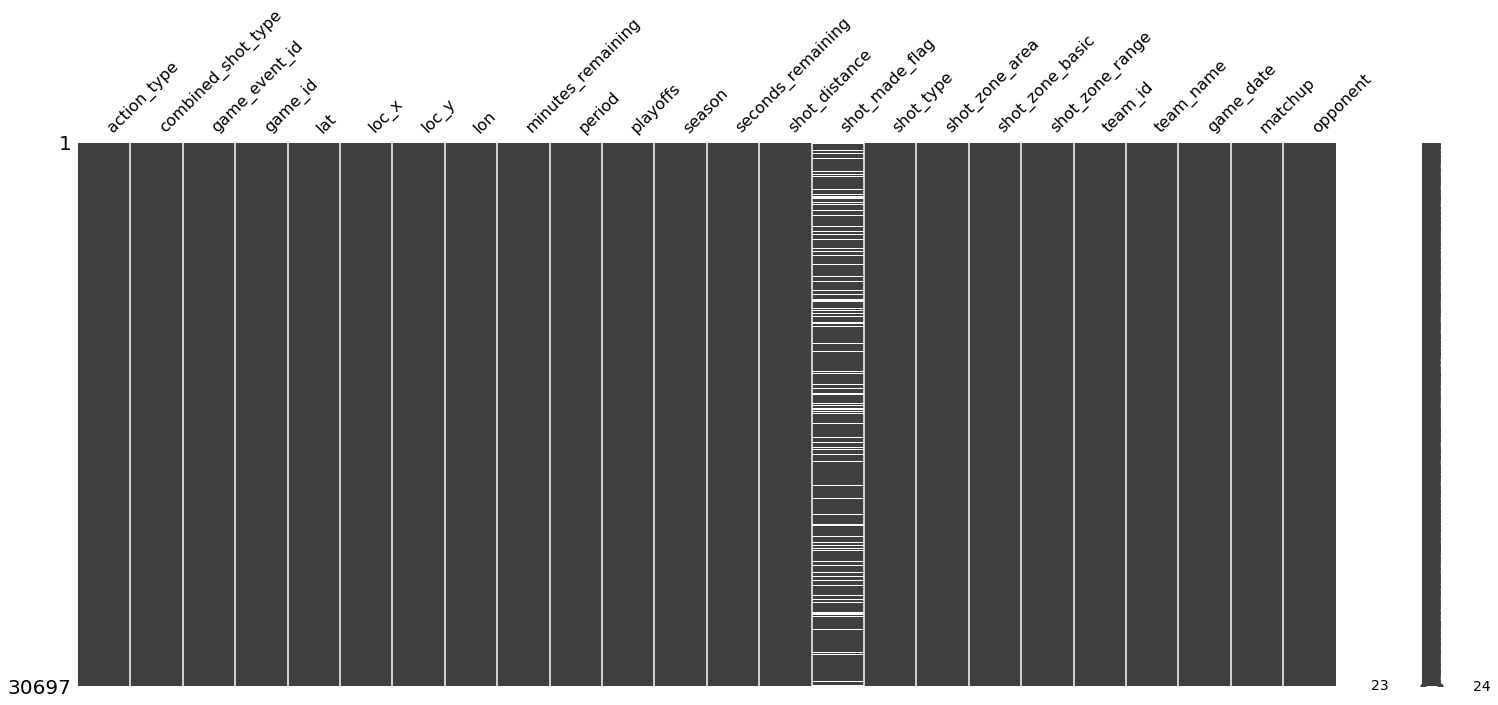

In [10]:
# 'missingno' 패키지를 활용한 시각화
msno.matrix(data)

In [11]:
# 변수 별 missing value 수
data.isna().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
dtype: int64

In [12]:
# info로도 missing value 포험 여부를 파악할 수 있음
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30697 entries, 1 to 30697
Data columns (total 24 columns):
action_type           30697 non-null category
combined_shot_type    30697 non-null category
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null category
playoffs              30697 non-null category
season                30697 non-null category
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null category
shot_type             30697 non-null category
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
tea

'shot_made_flag'는 슛이 성공 여부를 의미하며 이번 분석에서 타겟변수에 해당합니다. 이 값이 na인 경우는 지우도록 합시다.

In [13]:
data = data[data.shot_made_flag.isnull()==False]

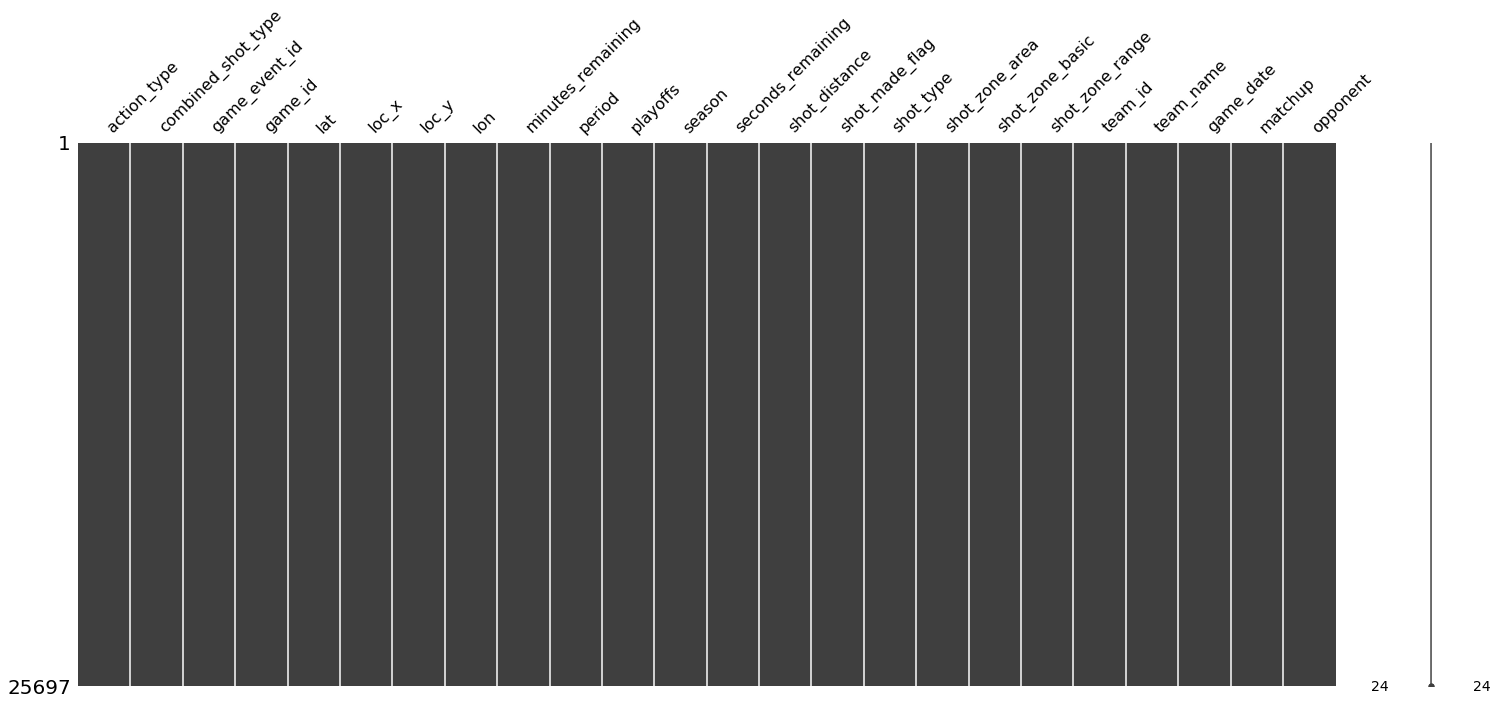

In [14]:
msno.matrix(data)

### 2. `minutes_remaining`, `seconds_remaining`

In [15]:
# 두 변수를 합쳐서 다른 변수를 생성
data['remaining_time'] = data['minutes_remaining']*60 + data['seconds_remaining']

In [16]:
# 두 변수를 제거
data.drop(['minutes_remaining', 'seconds_remaining'], axis=1, inplace=True)

### 3. `team_id`, `team_name`, `game_id`, `game_event_id`

In [17]:
# 두 변수는 한 개의 값만 가짐. (코비 브라이언트가 LA Lakers에서만 활약했기 때문)
print(data['team_id'].unique())
print(data['team_name'].unique())

[1610612747]
['Los Angeles Lakers']


In [18]:
# 두 변수를 제거
data.drop(['team_id', 'team_name'], axis=1, inplace=True)

In [19]:
# game_id, game_event_id 역시 분석에 투입할 변수는 아니므로 제거
data.drop(['game_id', 'game_event_id'], axis=1, inplace=True)

### 4. `opponent`, `matchup`

In [20]:
# 두 변수는 사실 중복된 면이 있음.
pd.DataFrame({'matchup':data['matchup'], 'opponent':data['opponent']})

,matchup,opponent
shot_id,,
2,LAL @ POR,POR
3,LAL @ POR,POR
4,LAL @ POR,POR
5,LAL @ POR,POR
6,LAL @ POR,POR
7,LAL @ POR,POR
9,LAL @ POR,POR
10,LAL @ POR,POR
11,LAL @ POR,POR


In [21]:
# 대신 'matchup' 변수에서 'vs'가 들어가면 홈경기, '@'가 들어가면 원정경기라는 정보가 있음.
# 이를 이용하여 홈경기/원정경기 여부를 표현하는 변수를 생성
data['home_play'] = data['matchup'].str.contains('vs').astype('int')

In [22]:
# 'matchup' 변수를 제거
data.drop('matchup', axis=1, inplace=True)

### 5. `lat`, `lon`, `loc_x`, `loc_y`

Text(0.5,1,'lat and lon')

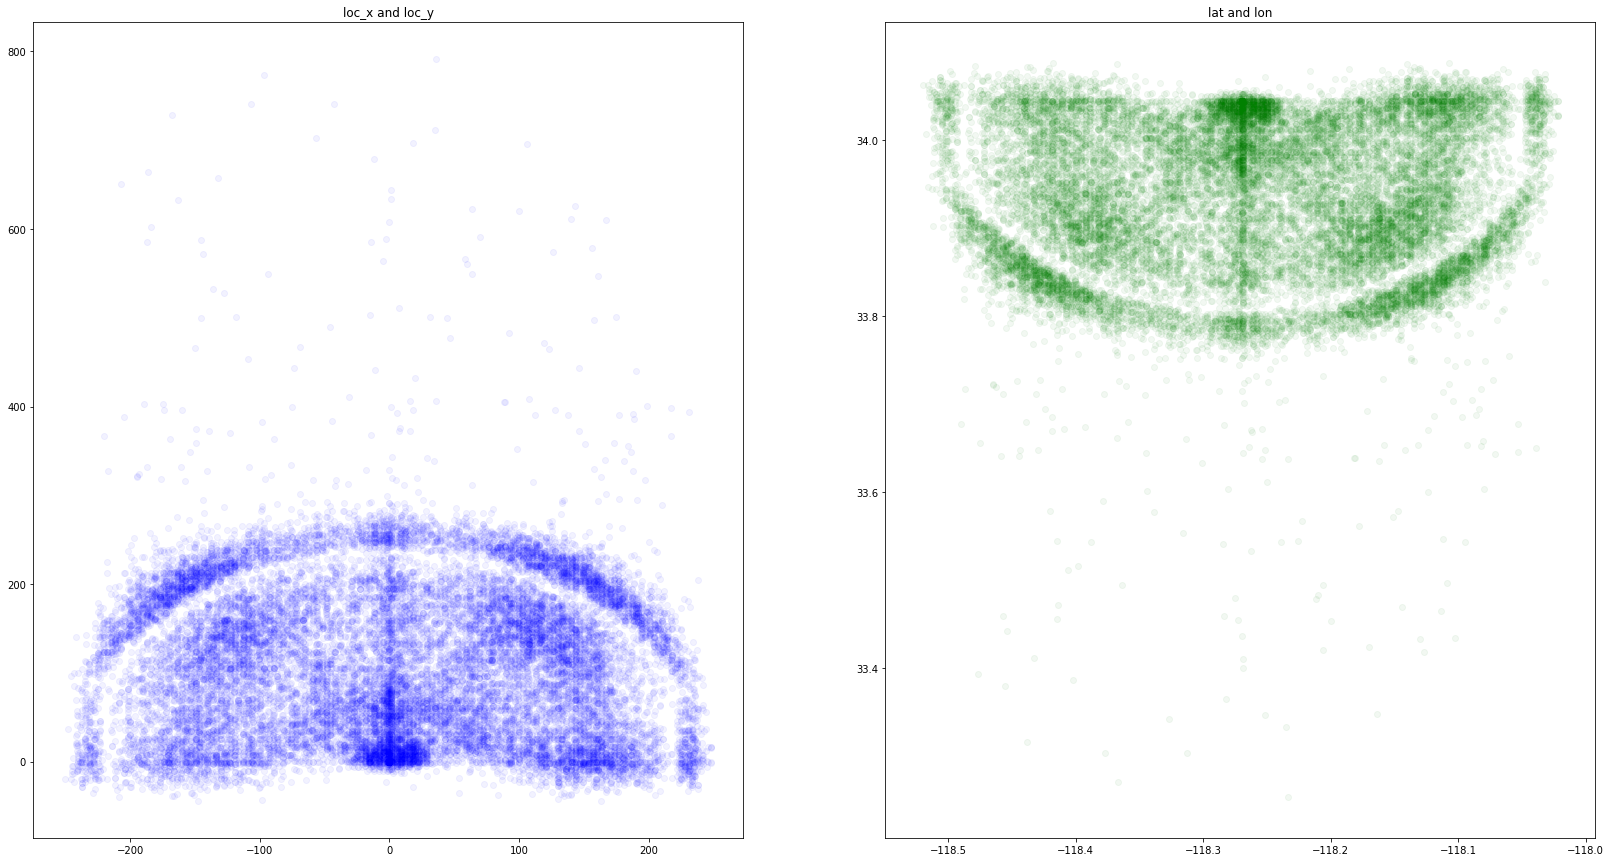

In [23]:
# plot 전체 size를 설정
plt.figure(figsize=(28,15))
alpha = 0.05 # plot 하나의 진하기 결정, 클수록 진한 포인트

# loc_x and loc_y
plt.subplot(121) # 1X2 map에 1번째 그림
plt.scatter(data['loc_x'], data['loc_y'], color='b', alpha=alpha)
plt.title('loc_x and loc_y')

# lat and lon
plt.subplot(122) # 1X2 map에 2번째 그림
plt.scatter(data['lon'], data['lat'], color='g', alpha=alpha)
plt.title('lat and lon')

In [24]:
# lat, lon은 loc_x, loc_y와 같이 shot의 위치를 나타내는 동일정보이므로 이 둘을 제거
data.drop(['lat', 'lon'], axis=1, inplace=True) # Correlated with loc_x and loc_y

In [25]:
# Loc_x, and loc_y를 25개의 항목으로 binning
data['loc_x'] = pd.cut(data['loc_x'], 25)
data['loc_y'] = pd.cut(data['loc_y'], 25)

### 6. `game_date`

In [26]:
# game_date 중 연과 월을 분석에 이용
data['game_date'] = pd.to_datetime(data['game_date'])
data['game_year'] = data['game_date'].dt.year
data['game_month'] = data['game_date'].dt.month

In [27]:
# game_date 변수를 제거
data.drop('game_date', axis=1, inplace=True)

### 7. Encode categorical variables

In [28]:
for i, col in enumerate(data.columns):
    print(i, '\t', col)

0 	 action_type
1 	 combined_shot_type
2 	 loc_x
3 	 loc_y
4 	 period
5 	 playoffs
6 	 season
7 	 shot_distance
8 	 shot_made_flag
9 	 shot_type
10 	 shot_zone_area
11 	 shot_zone_basic
12 	 shot_zone_range
13 	 opponent
14 	 remaining_time
15 	 home_play
16 	 game_year
17 	 game_month


In [29]:
# 이미 binary variable인 'playoffs', 'home_play'는 제외
categorial_cols = [
    'action_type', 'combined_shot_type', 'loc_x', 'loc_y', 'period', 'season',
    'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'opponent', 
    'game_year', 'game_month', ]

In [30]:
for cc in categorial_cols:
    dummies = pd.get_dummies(data[cc])
    dummies = dummies.add_prefix("{}_#_".format(cc))
    data.drop(cc, axis=1, inplace=True)
    data = data.join(dummies)

In [31]:
data.shape

(25697, 228)

In [32]:
for i, col in enumerate(data.columns):
    print(i, '\t', col)

0 	 playoffs
1 	 shot_distance
2 	 shot_made_flag
3 	 remaining_time
4 	 home_play
5 	 action_type_#_Alley Oop Dunk Shot
6 	 action_type_#_Alley Oop Layup shot
7 	 action_type_#_Cutting Finger Roll Layup Shot
8 	 action_type_#_Cutting Layup Shot
9 	 action_type_#_Driving Bank shot
10 	 action_type_#_Driving Dunk Shot
11 	 action_type_#_Driving Finger Roll Layup Shot
12 	 action_type_#_Driving Finger Roll Shot
13 	 action_type_#_Driving Floating Bank Jump Shot
14 	 action_type_#_Driving Floating Jump Shot
15 	 action_type_#_Driving Hook Shot
16 	 action_type_#_Driving Jump shot
17 	 action_type_#_Driving Layup Shot
18 	 action_type_#_Driving Reverse Layup Shot
19 	 action_type_#_Driving Slam Dunk Shot
20 	 action_type_#_Dunk Shot
21 	 action_type_#_Fadeaway Bank shot
22 	 action_type_#_Fadeaway Jump Shot
23 	 action_type_#_Finger Roll Layup Shot
24 	 action_type_#_Finger Roll Shot
25 	 action_type_#_Floating Jump shot
26 	 action_type_#_Follow Up Dunk Shot
27 	 action_type_#_Hook Bank S

## Split the data

In [37]:
X = data.loc[:,data.columns != 'shot_made_flag'].copy() # 'shot_made_flag'를 제외한 모든 columns를 선택
y = data.shot_made_flag.copy()

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=1234,
                                                   stratify=y)

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                 test_size=0.25,
                                                 random_state=1234,
                                                 stratify=y_train)

In [41]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(15417, 227)
(5140, 227)
(5140, 227)


## Train models

### 1. k-NN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [55]:
n_neighbors_set = [10, 15, 20, 25]
weights_set = ['uniform', 'distance']

knn_models = []
accuracy_train_set = []
accuracy_val_set = []

for k in n_neighbors_set:
    for weights in weights_set:
        print("Learning k-NN with k = %d, weights = %s" % (k, weights))
        knn = KNeighborsClassifier(n_neighbors=k, weights=weights)
        knn.fit(X_train, y_train)
        y_val_hat = knn.predict(X_val)
        y_train_hat = knn.predict(X_train)
        
        accuracy_train = metrics.accuracy_score(y_train, y_train_hat)
        accuracy_val = metrics.accuracy_score(y_val, y_val_hat)
        print("Train accuracy: %.4f" % accuracy_train)
        print("Validation accuracy: %.4f" % accuracy_val)
        print("")
        
        knn_models.append(knn)
        accuracy_train_set.append(accuracy_train)
        accuracy_val_set.append(accuracy_val)

Learning k-NN with k = 10, weights = uniform
Train accuracy: 0.6698
Validation accuracy: 0.5872

Learning k-NN with k = 10, weights = distance
Train accuracy: 0.9999
Validation accuracy: 0.5794

Learning k-NN with k = 15, weights = uniform
Train accuracy: 0.6556
Validation accuracy: 0.5811

Learning k-NN with k = 15, weights = distance
Train accuracy: 0.9999
Validation accuracy: 0.5821

Learning k-NN with k = 20, weights = uniform
Train accuracy: 0.6410
Validation accuracy: 0.5942

Learning k-NN with k = 20, weights = distance
Train accuracy: 0.9999
Validation accuracy: 0.5883

Learning k-NN with k = 25, weights = uniform
Train accuracy: 0.6351
Validation accuracy: 0.5895

Learning k-NN with k = 25, weights = distance
Train accuracy: 0.9999
Validation accuracy: 0.5907



In [56]:
accuracy_train_set

[0.6698449763248362,
 0.9999351365375884,
 0.655575014594279,
 0.9999351365375884,
 0.6410455990140753,
 0.9999351365375884,
 0.6351430239346176,
 0.9999351365375884]

In [57]:
accuracy_val_set

[0.58715953307393,
 0.5793774319066148,
 0.5811284046692607,
 0.5821011673151751,
 0.5941634241245136,
 0.5883268482490273,
 0.5894941634241245,
 0.5906614785992218]

In [58]:
best_accuracy_val = max(accuracy_val_set)
best_knn_idx = accuracy_val_set.index(best_accuracy_val)

print("Best validation accuracy: ", best_accuracy_val)
print("Best knn model: ", knn_models[best_knn_idx])

Best validation accuracy:  0.5941634241245136
Best knn model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')


### 2. Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [61]:
C_set = [0.1, 0.5, 1.0, 10.0, 100.0]
penalty_set = ['l2', 'l1']
lr_models = []
accuracy_train_set = []
accuracy_val_set = []

for C in C_set:
    for penalty in penalty_set:
        print("Learning LogisticRegression with C = %f, penalty = %s" % (C, penalty))
        
        # Fitting the model
        lr = LogisticRegression(penalty=penalty, C=C)
        lr.fit(X_train, y_train)
        
        # Evaluating the model
        y_train_hat = lr.predict(X_train)
        y_val_hat = lr.predict(X_val)
        
        accuracy_train = metrics.accuracy_score(y_train, y_train_hat)
        accuracy_val = metrics.accuracy_score(y_val, y_val_hat)
        print("Train accuracy: %.4f" % accuracy_train)
        print("Validation accuracy: %.4f" % accuracy_val)
        print("")
        
        lr_models.append(lr)
        accuracy_train_set.append(accuracy_train)
        accuracy_val_set.append(accuracy_val)

Learning LogisticRegression with C = 0.100000, penalty = l2
Train accuracy: 0.6822
Validation accuracy: 0.6759

Learning LogisticRegression with C = 0.100000, penalty = l1
Train accuracy: 0.6815
Validation accuracy: 0.6780

Learning LogisticRegression with C = 0.500000, penalty = l2
Train accuracy: 0.6829
Validation accuracy: 0.6753

Learning LogisticRegression with C = 0.500000, penalty = l1
Train accuracy: 0.6825
Validation accuracy: 0.6767

Learning LogisticRegression with C = 1.000000, penalty = l2
Train accuracy: 0.6829
Validation accuracy: 0.6743

Learning LogisticRegression with C = 1.000000, penalty = l1
Train accuracy: 0.6823
Validation accuracy: 0.6753

Learning LogisticRegression with C = 10.000000, penalty = l2
Train accuracy: 0.6832
Validation accuracy: 0.6741

Learning LogisticRegression with C = 10.000000, penalty = l1
Train accuracy: 0.6828
Validation accuracy: 0.6741

Learning LogisticRegression with C = 100.000000, penalty = l2
Train accuracy: 0.6828
Validation accura

In [62]:
accuracy_val_set

[0.675875486381323,
 0.6780155642023347,
 0.6752918287937744,
 0.6766536964980545,
 0.67431906614786,
 0.6752918287937744,
 0.6741245136186771,
 0.6741245136186771,
 0.67431906614786,
 0.6741245136186771]

In [63]:
best_accuracy_val = max(accuracy_val_set)
best_lr_idx = accuracy_val_set.index(best_accuracy_val)

print("Best validation accuracy: ", best_accuracy_val)
print("Best lr model: ", lr_models[best_lr_idx])

Best validation accuracy:  0.6780155642023347
Best lr model:  LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


### Test models

[k-NN]
- test accuracy:  0.5904669260700389
- classification report:
              precision    recall  f1-score   support

        0.0       0.60      0.77      0.68      2847
        1.0       0.56      0.36      0.44      2293

avg / total       0.58      0.59      0.57      5140

- confusion matrix: 


C:\Users\SNUH\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


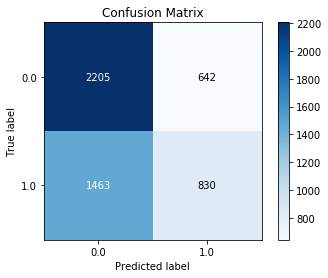

 - ROC curve: 


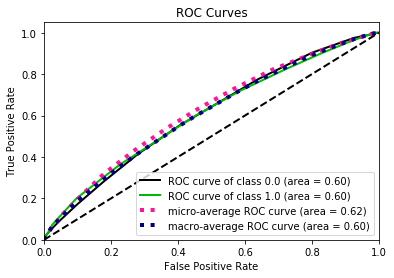

[Logistic Regression]
- test accuracy:  0.6859922178988327
- classification report:
              precision    recall  f1-score   support

        0.0       0.67      0.86      0.75      2847
        1.0       0.73      0.47      0.57      2293

avg / total       0.70      0.69      0.67      5140

- confusion matrix: 


C:\Users\SNUH\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


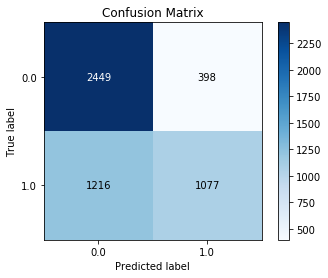

 - ROC curve: 


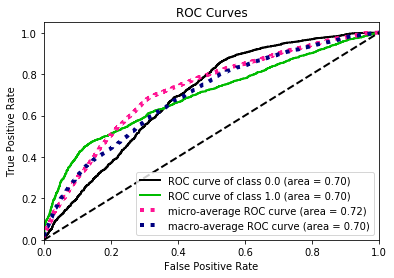

In [76]:
knn_best = knn_models[best_knn_idx]
lr_best = lr_models[best_lr_idx]

y_test_knn = knn_best.predict(X_test)
y_test_lr = lr_best.predict(X_test)

print("[k-NN]")
print("- test accuracy: ", metrics.accuracy_score(y_test, y_test_knn))
print("- classification report:\n", metrics.classification_report(y_test, y_test_knn))
print("- confusion matrix: ")
skplt.metrics.plot_confusion_matrix(y_test, y_test_knn, normalize=False)
plt.show()
print(" - ROC curve: ")
skplt.metrics.plot_roc(y_test, knn_best.predict_proba(X_test))
plt.show()

print("[Logistic Regression]")
print("- test accuracy: ", metrics.accuracy_score(y_test, y_test_lr))
print("- classification report:\n", metrics.classification_report(y_test, y_test_lr))
print("- confusion matrix: ")
skplt.metrics.plot_confusion_matrix(y_test, y_test_lr, normalize=False)
plt.show()
print(" - ROC curve: ")
skplt.metrics.plot_roc(y_test, lr_best.predict_proba(X_test))
plt.show()